In [3]:
words = open('names.txt', 'r').read().splitlines()

In [4]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [5]:
len(words)

32033

In [7]:
min(len(w) for w in words)

2

In [8]:
max(len(w) for w in words)

15

In [9]:
#bigrams of words
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        #print(ch1, ch2)

In [13]:
#sort by the count
sorted(b.items(), key = lambda kv: -kv[1]) #kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [14]:
import torch

In [17]:
a = torch.zeros((3,5), dtype = torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [16]:
a.dtype

torch.float32

In [28]:
#we want a bigger array
#we want the alphabet plus the two special characters <S> <E>
N = torch.zeros((28, 28), dtype = torch.int32)

In [45]:
chars = sorted(list(set(''.join(words)))) #join all the word and then extract all the singles not repeated chars
string_to_index = {s:i for i, s in enumerate(chars)}
string_to_index['<S>'] = 26
string_to_index['<E>'] = 27

In [46]:
"""
a -> [0, 0, 0, ... ] each zero represents a character
.
.
.
<E> -> [0, 0, 0, ...]

with the next code we try to see how many times the next word in the alphabet appears after the 'a', according to the list
"""
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = string_to_index[ch1] #return index value
        ix2 = string_to_index[ch2]
        N[ix1, ix2] += 1

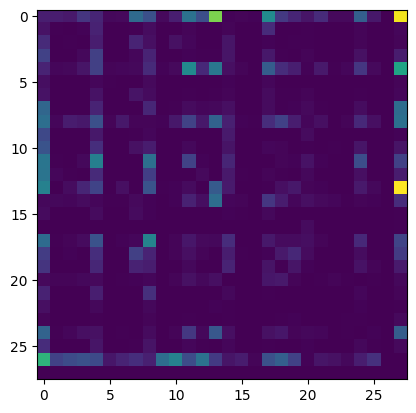

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [48]:
index_to_string = {i:s for s, i in string_to_index.items()}
index_to_string

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

In [54]:
N[0,27]

tensor(19920, dtype=torch.int32)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

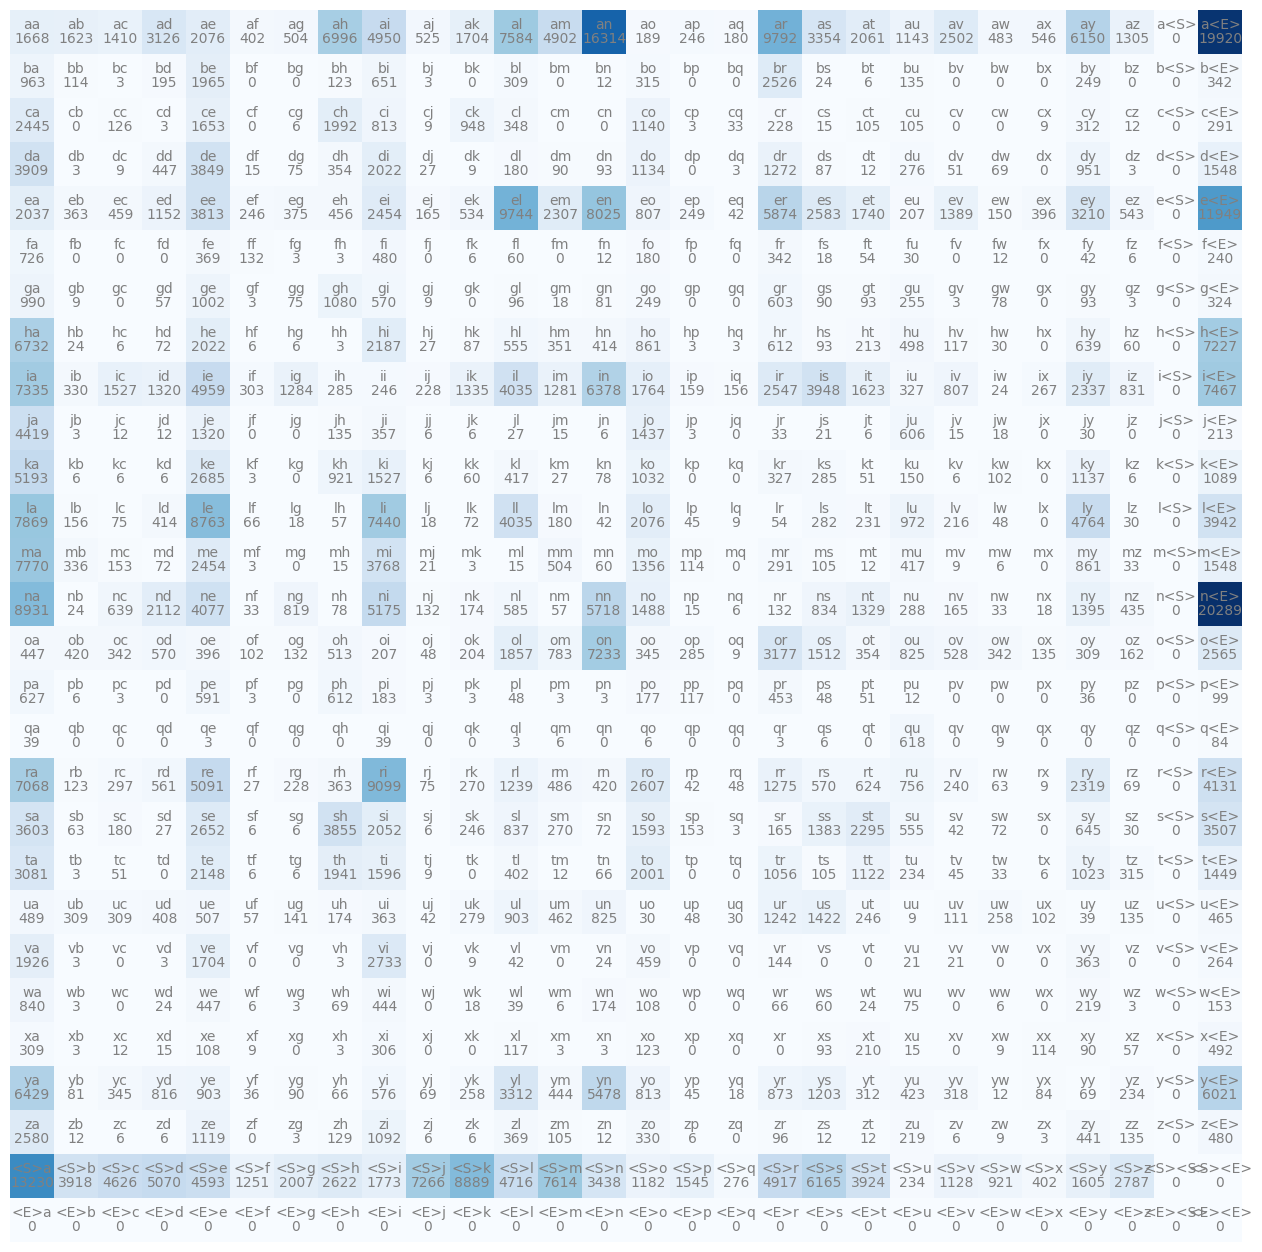

In [58]:
plt.figure(figsize = (16, 16))
plt.imshow(N, cmap='Blues')
#combinations of all characters
for i in range(28):
    for j in range(28):
        characters = index_to_string[i] + index_to_string[j] #aa, ab, ....
        plt.text(j,i, characters, ha = 'center', va = 'bottom', color = 'gray')
        plt.text(j, i, N[i, j].item(), ha = 'center', va = 'top', color = 'gray')
plt.axis('off')

In [61]:
#fix the matrix we have a whole coulumn with <S> as 0's and a whole row of <E> as 0's.
#WE WANT TO PRESERVE VALID INFORMATION AND GET RID OF THEM
N = torch.zeros((27, 27), dtype = torch.int32)

In [100]:
chars = sorted(list(set(''.join(words)))) #join all the word and then extract all the singles not repeated chars
string_to_index = {s:i+1 for i, s in enumerate(chars)}
string_to_index['.'] = 0
index_to_string = {i:s for s, i in string_to_index.items()}
index_to_string

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [69]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = string_to_index[ch1] #return index value
        ix2 = string_to_index[ch2]
        N[ix1, ix2] += 1

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

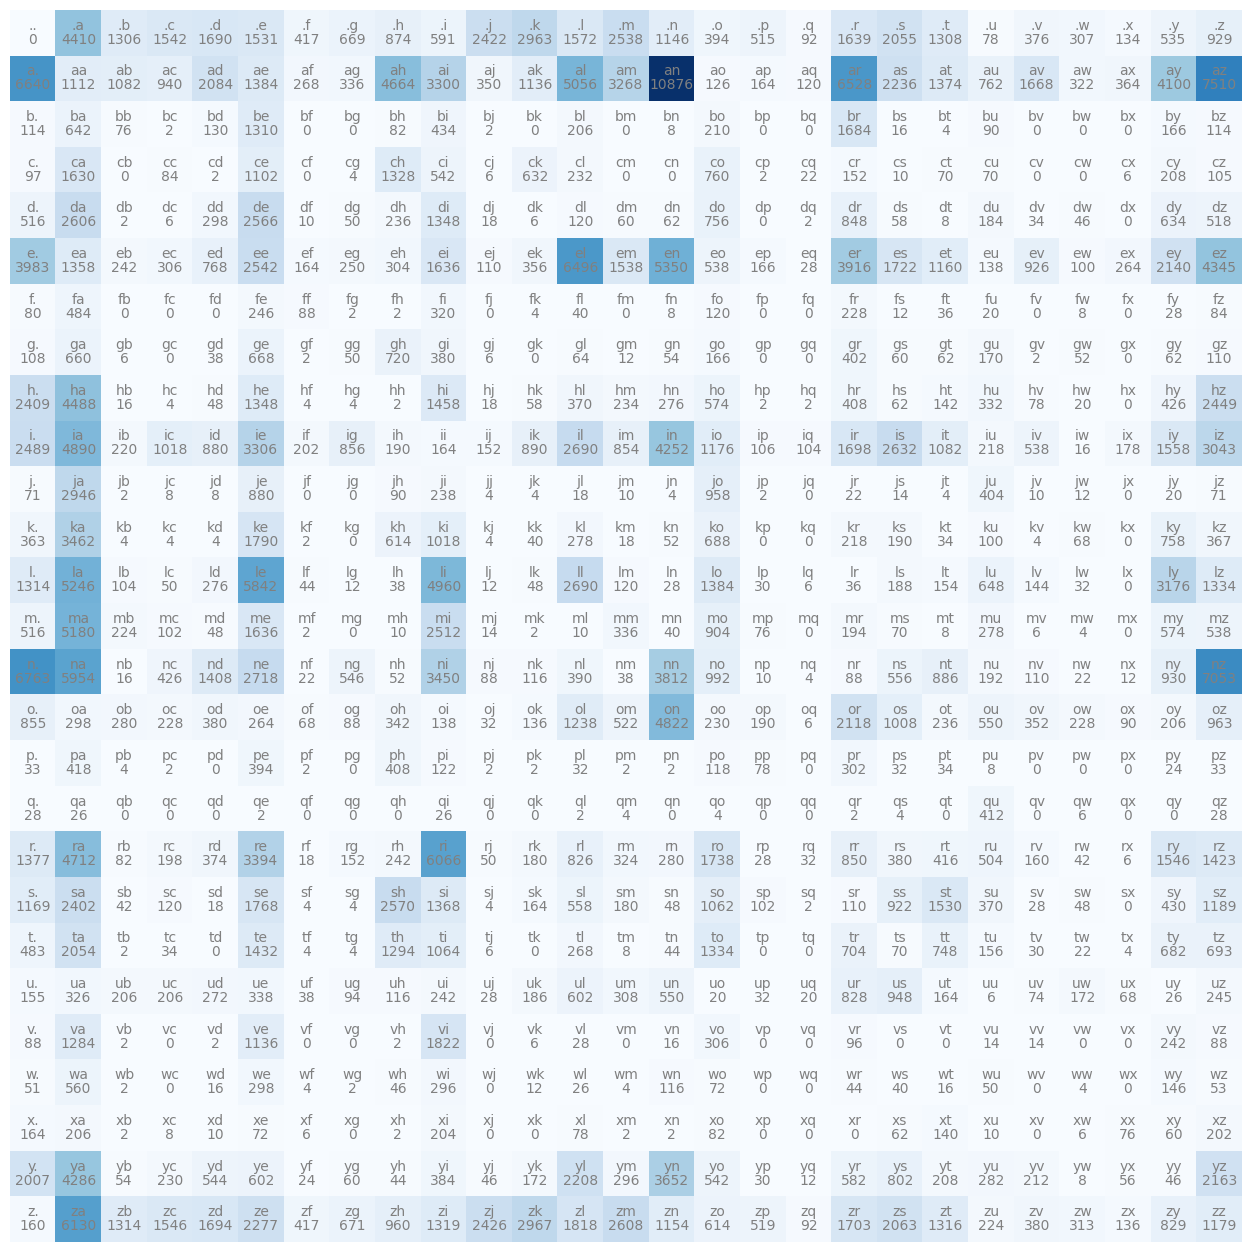

In [70]:
plt.figure(figsize = (16, 16))
plt.imshow(N, cmap='Blues')
#combinations of all characters
for i in range(27):
    for j in range(27):
        characters = index_to_string[i] + index_to_string[j] #aa, ab, ....
        plt.text(j,i, characters, ha = 'center', va = 'bottom', color = 'gray')
        plt.text(j, i, N[i, j].item(), ha = 'center', va = 'top', color = 'gray')
plt.axis('off')

In [94]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [96]:
#convert them in to probabilities
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [87]:
#we want a multinomial distribution, we use a generator of random numbers to make deterministic to follow Andrej Karpathy in his course
# https://docs.pytorch.org/docs/stable/generated/torch.multinomial.html
# https://docs.pytorch.org/docs/stable/generated/torch.Generator.html

generator = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator = generator)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [88]:
# tensor([0.6064, 0.3033, 0.0903]) -> 0.6064 ~ 60% percent of the distribution will be this, 0.3033 ~ 30% and so so so
#so when we generate a multinomial distribution using random sample it can goes like this
# says that we take a value from the sample and it's returned
torch.multinomial(p, num_samples=20, replacement = True, generator = generator)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [104]:
p = N[0].float()
p = p / p.sum()
print(p)
generator = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement = True, generator = generator).item() #draw only one
print(index_to_string[ix])

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])
c


In [107]:
generator = torch.Generator().manual_seed(2147483647)
for i in range(20):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement = True, generator = generator).item() #draw only one
        out.append(index_to_string[ix])
        if ix == 0:
            break
    print(''.join(out))

cexzmazjallurailezkaynnellzimittain.
llaynzkanza.
stazthubrtthrigotai.
mozjellavo.
ke.
teda.
kalemimmsadey.
nkaviynyzftlspihinivenvorhlasu.
dsordelezgl.
penzaisana.
razdineeezka.
deru.
firit.
gaikajahzabevare.
kiystzelenzanzmenah.
keenzxzalezalmahavazsorozysoshlaitenzmzeegzsiseriyzann.
illeleldolezmeezhalamigamanemin.
asharin.
alcalar.
jayzkazve.


cexzmazjallurailezkaynnellzimittain.
